In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
feat_null=[feat for feat in data.columns if(data[feat].isnull().sum()>=1)]
for feat in feat_null:
    print(feat,np.round(data[feat].isnull().mean()*100,5),"% missing values")

Income 1.07143 % missing values


In [8]:
data[feat_null].select_dtypes(exclude='object').describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [9]:
data['Income']=data.Income.fillna(data.Income.median())

In [10]:
data.duplicated().sum()

0

In [11]:
data=data.drop(columns=['ID','Z_CostContact','Z_Revenue'])

In [12]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [13]:
from datetime import datetime
raw_df=data.copy()
data['Age']=2025-data['Year_Birth']
data['Education']=data['Education'].replace({'Basic':0,'2n Cycle':1,'Master':2,'PhD':3,'Graduation':4}).infer_objects(copy=False).astype(int)
data['Marital_Status']=data['Marital_Status'].replace({'Married':1,'Together':1,'Single':0,'Divorced':0,'Widow':0,'Alone':0,'Absurd':0,'YOLO':0}).infer_objects(copy=False).astype(int)
data['Children']=data['Kidhome']+data['Teenhome']
data['Family_size']=data['Marital_Status']+data['Children']+1
data['Total_Spending']=data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data['Total_Promo']=data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format="%d-%m-%Y")
today=datetime.today()
data['Days_as_Customer']=(today-data['Dt_Customer']).dt.days
data['Offers_Responded_To']=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']
data["Parental Status"] = np.where(data["Children"] > 0, 1, 0)
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
data=data.drop(columns = columns_to_drop, axis = 1)
data.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)
data = data[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total_Promo","NumWebVisitsMonth"]]

C:\Users\prudh\AppData\Local\Temp\ipykernel_26504\2810514518.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education']=data['Education'].replace({'Basic':0,'2n Cycle':1,'Master':2,'PhD':3,'Graduation':4}).infer_objects(copy=False).astype(int)
C:\Users\prudh\AppData\Local\Temp\ipykernel_26504\2810514518.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Marital_Status']=data['Marital_Status'].replace({'Married':1,'Together':1,'Single':0,'Divorced':0,'Widow':0,'Alone':0,'Absurd':0,'YOLO':0}).infer_objects(copy=Fal

In [14]:
cont_feat=[feat for feat in data.columns if((data[feat].nunique()>25) and (data[feat].dtype!='O'))]

In [15]:
cont_feat

['Age',
 'Income',
 'Total_Spending',
 'Days_as_Customer',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold']

In [16]:
len(cont_feat)

11

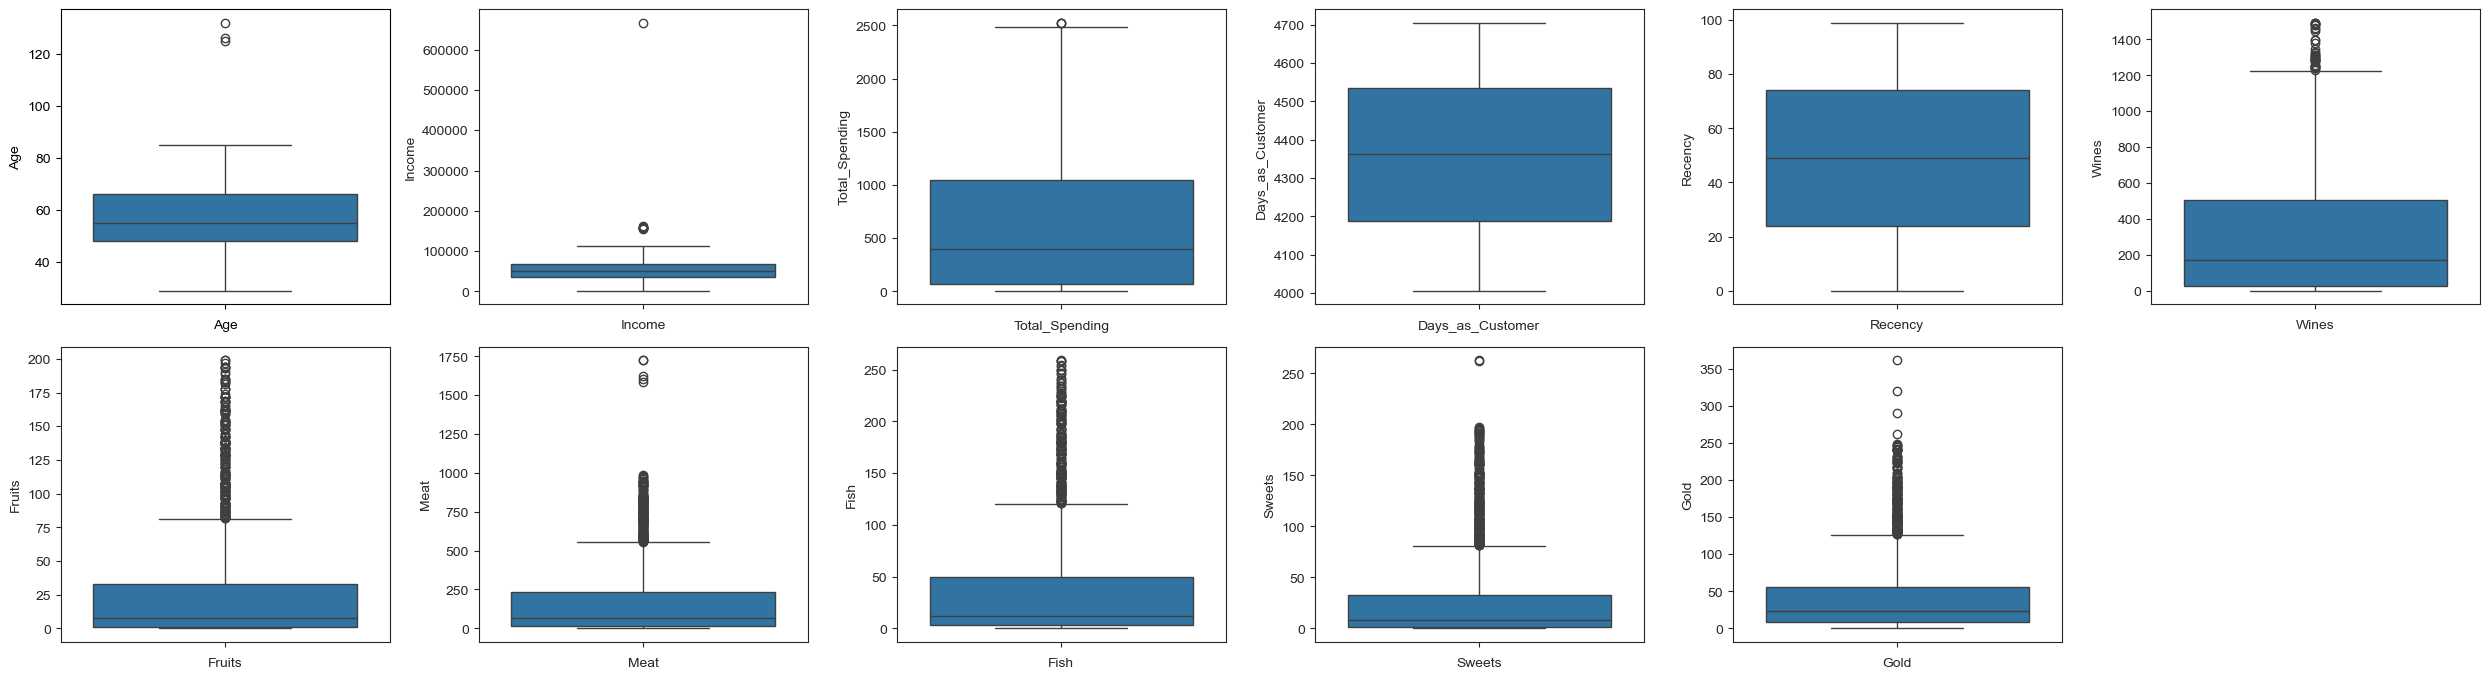

In [17]:
conti_fea=cont_feat.copy()
plt.figure(figsize=(25,10))
for i in range(len(conti_fea)):
    plt.subplot(3,6,i+1)
    sns.set_style('ticks')
    plt.xlabel(conti_fea[i])
    sns.boxplot(data[conti_fea[i]])
plt.tight_layout()

In [18]:
def detect_outliers(col):
    data[col]=data[col].astype(float)
    pert25=data[col].quantile(0.25)
    pert75=data[col].quantile(0.75)
    print('\n ####', col , '####')
    print("25% percent",pert25)
    print("75% percent",pert75)
    iqr=pert75-pert25
    print("IQR:",iqr)
    upper_limit=pert75+1.5*iqr
    lower_limit=pert25-1.5*iqr
    print("Upper Limit:",upper_limit)
    print("Lower Limit:",lower_limit)
    data.loc[(data[col]>upper_limit),col]=upper_limit
    data.loc[(data[col]<lower_limit),col]=lower_limit
    return data
for col in conti_fea:
    detect_outliers(col)


 #### Age ####
25% percent 48.0
75% percent 66.0
IQR: 18.0
Upper Limit: 93.0
Lower Limit: 21.0

 #### Income ####
25% percent 35538.75
75% percent 68289.75
IQR: 32751.0
Upper Limit: 117416.25
Lower Limit: -13587.75

 #### Total_Spending ####
25% percent 68.75
75% percent 1045.5
IQR: 976.75
Upper Limit: 2510.625
Lower Limit: -1396.375

 #### Days_as_Customer ####
25% percent 4186.75
75% percent 4535.0
IQR: 348.25
Upper Limit: 5057.375
Lower Limit: 3664.375

 #### Recency ####
25% percent 24.0
75% percent 74.0
IQR: 50.0
Upper Limit: 149.0
Lower Limit: -51.0

 #### Wines ####
25% percent 23.75
75% percent 504.25
IQR: 480.5
Upper Limit: 1225.0
Lower Limit: -697.0

 #### Fruits ####
25% percent 1.0
75% percent 33.0
IQR: 32.0
Upper Limit: 81.0
Lower Limit: -47.0

 #### Meat ####
25% percent 16.0
75% percent 232.0
IQR: 216.0
Upper Limit: 556.0
Lower Limit: -308.0

 #### Fish ####
25% percent 3.0
75% percent 50.0
IQR: 47.0
Upper Limit: 120.5
Lower Limit: -67.5

 #### Sweets ####
25% percent 1

In [19]:
data[cont_feat].skew(axis=0,skipna=True)

Age                 0.120199
Income              0.090027
Total_Spending      0.860245
Days_as_Customer   -0.015216
Recency            -0.001987
Wines               1.096611
Fruits              1.233953
Meat                1.213585
Fish                1.230822
Sweets              1.213346
Gold                1.111307
dtype: float64

In [20]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] 
numeric_features = [x for x in numeric_features if x not in outlier_features]

In [21]:
from sklearn.preprocessing import StandardScaler , PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
df1=data.copy()

num_pipe=Pipeline(steps=[("Imputer",SimpleImputer(strategy='constant',fill_value=0)),
                         ("StandardScaler",StandardScaler())])
out_pipe=Pipeline(steps=[("Imputer",SimpleImputer(strategy='constant',fill_value=0)),
                         ("Transformer",PowerTransformer(standardize=True))])
preprocess=ColumnTransformer([("numeric trans",num_pipe,numeric_features),
                              ("Outlier trans",out_pipe,outlier_features)]
                            )

coli=df1.columns
df1=preprocess.fit_transform(df1)
scaled_data=pd.DataFrame(df1,columns=coli)
scaled_data

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total_Promo,NumWebVisitsMonth
0,0.822041,-1.346874,-1.584605,-1.264505,0.299651,1.531185,0.307039,1.409304,2.510890,-0.550785,...,-0.439037,0.693904,1.062784,1.487681,1.504406,1.493989,1.474200,1.196801,1.005580,1.315365
1,0.822041,-1.346874,0.631072,1.396361,-0.263808,-1.190545,-0.383664,-1.110409,-0.568720,-1.166125,...,-0.439037,-0.130463,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,-0.967034,1.240015,-1.441417
2,0.822041,0.742460,-1.584605,-1.264505,0.943420,-0.205773,-0.798086,1.409304,-0.226541,1.295237,...,-0.439037,-0.542647,0.748918,1.145877,0.456428,1.435812,0.579704,0.473642,0.360856,0.661170
3,0.822041,0.742460,0.631072,0.065928,-1.204881,-1.061881,-0.798086,-0.750450,-0.910898,-0.550785,...,-0.439037,0.281720,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,-1.069040,-1.314808,-1.117211
4,-0.075751,0.742460,0.631072,0.065928,0.307056,-0.953012,1.550305,0.329427,0.115638,0.064556,...,-0.439037,-0.130463,0.123712,1.058075,0.406278,0.832291,0.741799,-0.368949,-1.033704,0.179322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.822041,0.742460,0.631072,0.065928,0.447037,0.135680,-0.107383,1.769263,0.115638,-0.550785,...,-0.439037,-0.130463,1.153805,1.058075,0.705632,0.772188,1.474200,1.590701,0.194803,1.140457
2236,-0.075751,0.742460,0.631072,2.726794,0.580377,-1.655713,0.237969,1.409304,-0.226541,-0.243114,...,1.035390,0.693904,0.712718,-1.446458,-0.479346,-1.502516,-1.426040,-0.794538,1.847890,0.217559
2237,0.822041,-1.346874,-1.584605,-1.264505,0.244375,-0.982703,1.446700,-0.750450,0.115638,2.218248,...,1.035390,0.281720,1.365262,1.131987,0.829676,0.595178,0.228963,-0.007089,-1.033704,1.069706
2238,-0.973543,0.742460,0.631072,0.065928,0.830288,-0.977755,-1.419719,0.689386,0.799996,1.295237,...,-0.439037,-0.954831,0.752462,0.818633,0.819805,1.206988,0.810460,0.825585,1.084143,0.730787


In [57]:
from sklearn.decomposition import PCA
df_scaled=scaled_data.copy()
var_ratio={}
for i in range(2,18):
    pca=PCA(n_components=i)
    df_pca=pca.fit(df_scaled)
    var_ratio[i]=sum(df_pca.explained_variance_ratio_)

In [ ]:
from sklearn.metrics import 

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for i in range(2,8):
    print("PCA with no of components",i)
    pca=PCA(n_components=i)
    data_pca=pca.fit_transform(df_scaled)
    for j in range(2,7):
        kmeans=KMeans(n_clusters=j)
        label=kmeans.fit_predict(data_pca)
        print("Silhoutte Score for ",j,"Clusters :",silhouette_score(data_pca,label),"Inertia:",kmeans.inertia_)
    print()

PCA with no of components 2
Silhoutte Score for  2 Clusters : 0.5295668374007706 Inertia: 9030.438952715527
Silhoutte Score for  3 Clusters : 0.5113522906696052 Inertia: 5105.004401772257
Silhoutte Score for  4 Clusters : 0.4596407349305269 Inertia: 3941.88067681515
Silhoutte Score for  5 Clusters : 0.453200367219158 Inertia: 3278.5880381913807
Silhoutte Score for  6 Clusters : 0.3958292826309598 Inertia: 2799.599923510283

PCA with no of components 3
Silhoutte Score for  2 Clusters : 0.4631050552978142 Inertia: 12141.178018926028
Silhoutte Score for  3 Clusters : 0.4170296619205675 Inertia: 8204.966580955264
Silhoutte Score for  4 Clusters : 0.33631341966969286 Inertia: 7060.663680095309
Silhoutte Score for  5 Clusters : 0.3398803147832673 Inertia: 6399.67850044727
Silhoutte Score for  6 Clusters : 0.3112639176767483 Inertia: 5368.15829842177

PCA with no of components 4
Silhoutte Score for  2 Clusters : 0.42735466706635716 Inertia: 14529.72382052948
Silhoutte Score for  3 Clusters : 